# 05A. Integrators for second order ODEs

### Mingyang Lu

### 2/1/2024

We will discuss the numerical methods for integrating Newton's equation of motion.$$ \frac{d^2}{dt^2}x(t) = F(x,t )/m = f(x,t) \tag{1}$$Here, $x$ represents the position of a particle, and $t$ represents time. $F$ is a function of $x$, representing the force to the particle, and $m$ is the mass. We use $f$ to simplify the expression of Equation (1).Newton's equation of motion can also be written in the following form:\begin{equation}\begin{cases}  \frac{dv}{dt} = f \tag{2}\\  \frac{dx}{dt} = v \end{cases}\end{equation}# Modeling a harmonic oscillatorHarmonic oscillator is a simple model, where$$ f(x) = - kx$$

In [1]:
# force of a harmonic oscillator
def f_ho(t, x, k):
    return -k * x

# Euler methodSimilar to the Euler method for first-order ODEs, the Euler method can be applied to integrate second-order ODEs iteratively as follows.$$v_{n+1} = v_n + hf_n  $$$$x_{n+1} = x_n + hv_n  $$

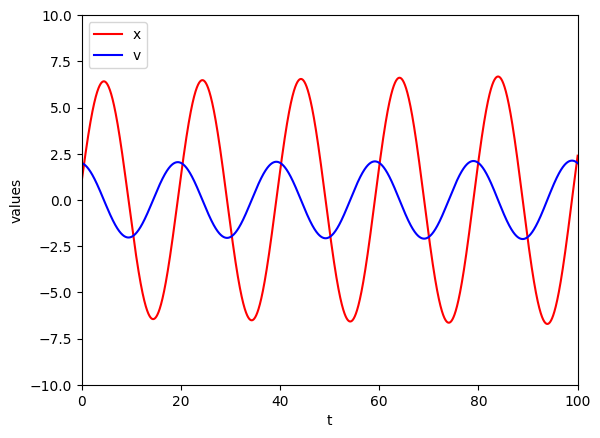

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Euler method
def euler_md(f, t0, x0, v0, t_total, dt, **kwargs):
    # f: 2nd derivative function
    # t0: initial time
    # x0: initial position x
    # v0: initial velocity v
    # t_total: total simulation time
    # dt: time step size
    t_all = np.arange(t0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)
    v_all = np.zeros(n_all)
    x_all[0] = x0
    v_all[0] = v0
    for i in range(n_all - 1):
        v_all[i + 1] = v_all[i] + dt * f(t_all[i], x_all[i], **kwargs)
        x_all[i + 1] = x_all[i] + dt * v_all[i]
    return np.vstack((t_all, x_all, v_all)).T  # the output is a matrix of t, x, v for all time steps

# Run Euler simulation 1, dt = 0.01
dt1 = 0.01
k = 0.1
result_ho_euler = euler_md(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt1, k=k)

# Plotting the outcomes
plt.plot(result_ho_euler[:, 0], result_ho_euler[:, 1], color='red', label='x')
plt.plot(result_ho_euler[:, 0], result_ho_euler[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

We can observe reasonable harmonic oscillations in the simulation when the time step size is small. However, if we choose a larger time step size, now the trajectory drifts away.

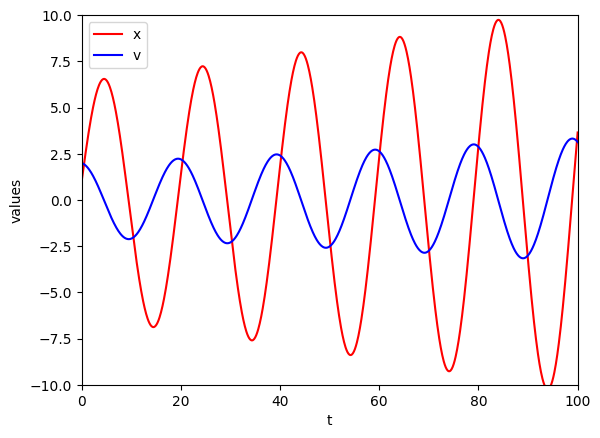

In [3]:
# Run Euler simulation 2, dt = 0.1
dt2 = 0.1
result_ho_euler2 = euler_md(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt2, k=k)

# Plotting the outcomes
plt.plot(result_ho_euler2[:, 0], result_ho_euler2[:, 1], color='red', label='x')
plt.plot(result_ho_euler2[:, 0], result_ho_euler2[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

We can compute the massic energy (energy per unit mass) $e = \frac{1}{2}kx^2 +  \frac{1}{2}v^2$.

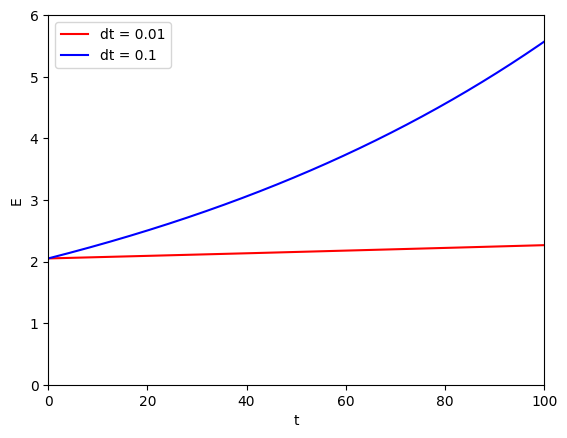

In [4]:
# Compute massic energy
def energy_ho(result, k):
    # result: matrix of simulation outputs, (columns: t, x, v)
    # k: spring constant
    potential_e = 0.5 * k * result[:, 1]**2
    kinetic_e = 0.5 * result[:, 2]**2
    return potential_e + kinetic_e

# Plotting the energy
plt.plot(result_ho_euler[:, 0], energy_ho(result_ho_euler, k), color='red', label='dt = 0.01')
plt.plot(result_ho_euler2[:, 0], energy_ho(result_ho_euler2, k), color='blue', label='dt = 0.1')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim(0, 100)
plt.ylim(0, 6)
plt.legend(loc='upper left')
plt.show()

The massic energy is clearly not conserved for Euler simulations with large time step sizes. For smaller time step sizes, the energy has much less changes, but still not a constant.
## Symplectic Euler methodThere are two important properties for a good MD integrator: perservation of the symplectic form which ensures energy conservation, and time reversibility which ensures to have reverse motions. The Euler method is not symplectic and not time reversible. A very small adjustment to the Euler method would make the method symplectic but not time reversible.$$v_{n+1} = v_n + hf_n  $$$$x_{n+1} = x_n + hv_{n+1}  $$I will leave its implementation and analysis to the readers.

# Leapfrog methodThe leapfrog method is a second order integrator for Newton's equation of motion. It requires to compute $v$ at half time steps. $$x_{n+1} = x_n + hv_{n+1/2}  $$$$v_{n+3/2}  = v_{n+1/2}  + hf_{n+1} $$The leapfrog algorithm requires the initial condition $x_0$ and $v_{1/2}$. The latter can be approximated by$$ v_{1/2} = v_0 + \frac{1}{2}hf_0$$

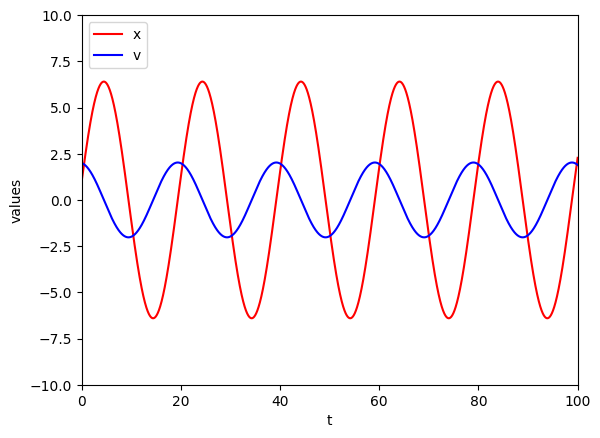

In [5]:
# Leapfrog method
def leapfrog(f, t0, x0, v0, t_total, dt, **kwargs):
    # f:  2nd derivative function
    # t0: initial time
    # x0: initial position x
    # v0: initial velocity v
    # t_total: total simulation time
    # dt: time step size 
    t_all = np.arange(t0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)
    v_all = np.zeros(n_all)
    x_all[0] = x0
    v_all[0] = v0 + 0.5 * dt * f(t0, x0, **kwargs)  # approximation for a half step
    for i in range(1, n_all):
        x_all[i] = x_all[i - 1] + dt * v_all[i - 1]
        v_all[i] = v_all[i - 1] + dt * f(t_all[i], x_all[i], **kwargs)
    return np.vstack((t_all, x_all, v_all)).T   # the output is a matrix of t, x, v for all time steps

# Run Leapfrog simulation 1, dt = 0.01
result_ho_leapfrog = leapfrog(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt1, k=k)

# Plotting the outcomes
plt.plot(result_ho_leapfrog[:, 0], result_ho_leapfrog[:, 1], color='red', label='x')
plt.plot(result_ho_leapfrog[:, 0] + 0.5 * dt1, result_ho_leapfrog[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

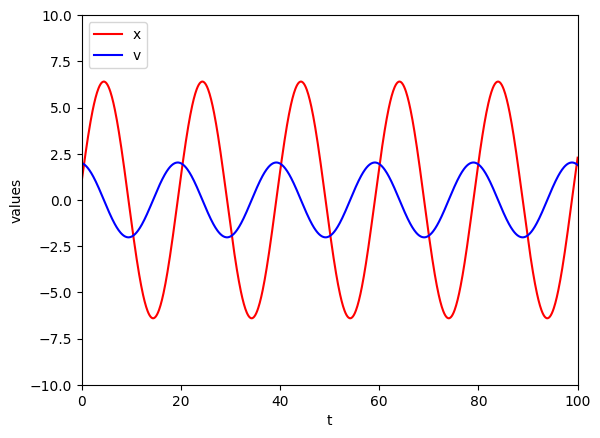

In [6]:
# Run Leapfrog simulation 2, dt = 0.1
result_ho_leapfrog2 = leapfrog(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt2, k=k)

# Plotting the outcomes
plt.plot(result_ho_leapfrog2[:, 0], result_ho_leapfrog2[:, 1], color='red', label='x')
plt.plot(result_ho_leapfrog2[:, 0] + 0.5 * dt2, result_ho_leapfrog2[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

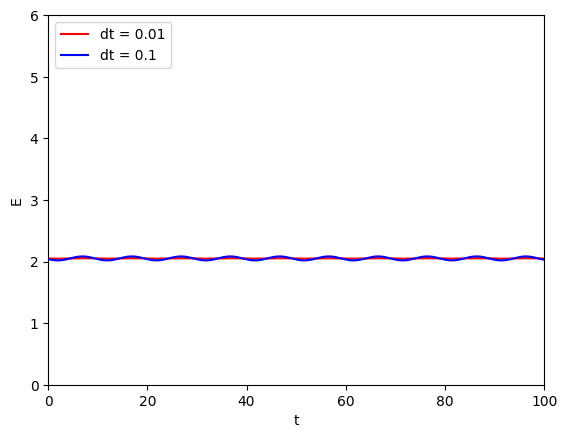

In [7]:
# Plotting the energy
plt.plot(result_ho_leapfrog[:, 0], energy_ho(result_ho_leapfrog, k), color='red', label='dt = 0.01')
plt.plot(result_ho_leapfrog2[:, 0], energy_ho(result_ho_leapfrog2, k), color='blue', label='dt = 0.1')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim(0, 100)
plt.ylim(0, 6)
plt.legend(loc='upper left')
plt.show()

In leapfrog simulations, the massic energy does not drift even for large time step sizes. Note there is a small issue in the energy calculation, as the leapfrog method saves $x_n$ and $v_{n+1/2}$, not $x$ and $v$ for the same time points. Because of that, you will find small oscillatory deviation of massic energy when the time step size is large.

# Velocity Verlet methodThe leapfrog method does not provide $x$ and $v$ for the same time points. A simple way to address that is to integrate $v$ for two half steps.$$v_{n+1/2}  = v_{n} + \frac{1}{2}hf_n $$$$x_{n+1} = x_n + hv_{n+1/2}  $$$$v_{n+1}  = v_{n+1/2}  + \frac{1}{2}hf_{n+1} $$

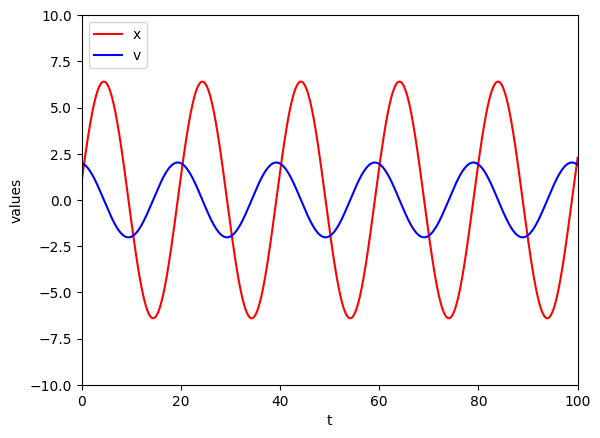

In [8]:
# Velocity Verlet method
def velocity_verlet(f, t0, x0, v0, t_total, dt, **kwargs):
    # f:  2nd derivative function
    # t0: initial time
    # x0: initial position x
    # v0: initial velocity v
    # t_total: total simulation time
    # dt: time step size 
    t_all = np.arange(t0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)
    v_all = np.zeros(n_all)
    x_all[0] = x0
    v_all[0] = v0 
    for i in range(1, n_all):
        v_half = v_all[i - 1] + 0.5 * dt * f(t_all[i - 1], x_all[i - 1], **kwargs)
        x_all[i] = x_all[i - 1] + dt * v_half
        v_all[i] = v_half + 0.5 * dt * f(t_all[i], x_all[i], **kwargs)
    return np.vstack((t_all, x_all, v_all)).T   # the output is a matrix of t, x, v for all time steps

# Run Velocity Verlet simulation 1, dt = 0.01
result_ho_vv = velocity_verlet(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt1, k=k)

# Plotting the outcomes
plt.plot(result_ho_vv[:, 0], result_ho_vv[:, 1], color='red', label='x')
plt.plot(result_ho_vv[:, 0], result_ho_vv[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

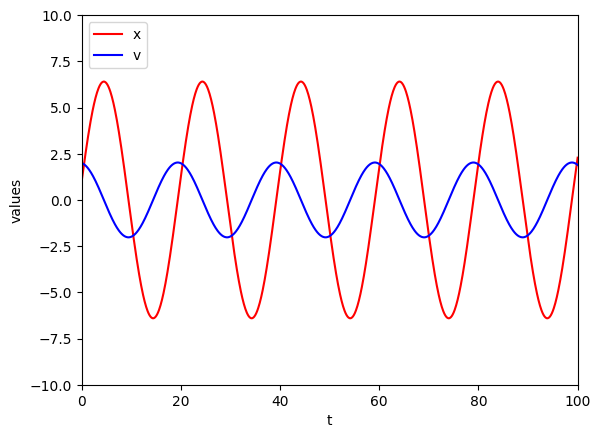

In [9]:
# Run Velocity Verlet simulation 2, dt = 0.1
result_ho_vv2 = velocity_verlet(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt2, k=k)

# Plotting the outcomes
plt.plot(result_ho_vv2[:, 0], result_ho_vv2[:, 1], color='red', label='x')
plt.plot(result_ho_vv2[:, 0], result_ho_vv2[:, 2], color='blue', label='v')
plt.xlabel('t')
plt.ylabel('values')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()

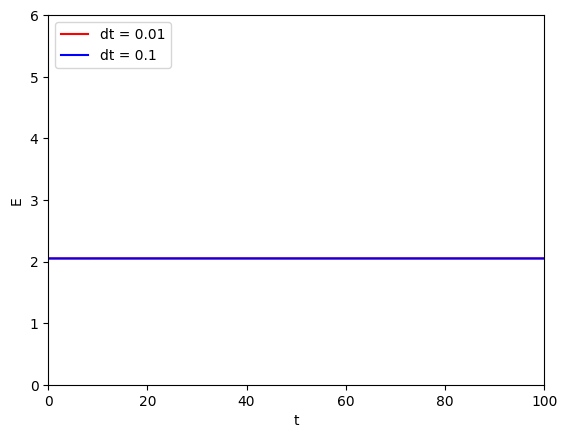

In [10]:
# Plotting the energy
plt.plot(result_ho_vv[:, 0], energy_ho(result_ho_vv, k), color='red', label='dt = 0.01')
plt.plot(result_ho_vv2[:, 0], energy_ho(result_ho_vv2, k), color='blue', label='dt = 0.1')
plt.xlabel('t')
plt.ylabel('E')
plt.xlim(0, 100)
plt.ylim(0, 6)
plt.legend(loc='upper left')
plt.show()

With velocity Verlet, massic energy is conserved regardless of different time step sizes. 

## Position Verlet method

Similar to velocity Verlet method, one can also do position Verlet by integrating $x$ for two half steps. I will leave it for students to think about how to do it.

# Verlet method

If velocity is not needed as an output, we can use the Verlet method, which integrates only $x$.

$$x_{n+2} = 2x_{n+1} - x_{n} + h^2F_{n+1}$$
(Think why this works.)

For the first step, $x_1$ can be computed by:

$$x_1 = x_0 + hv_0 + \frac{1}{2}h^2f_0$$

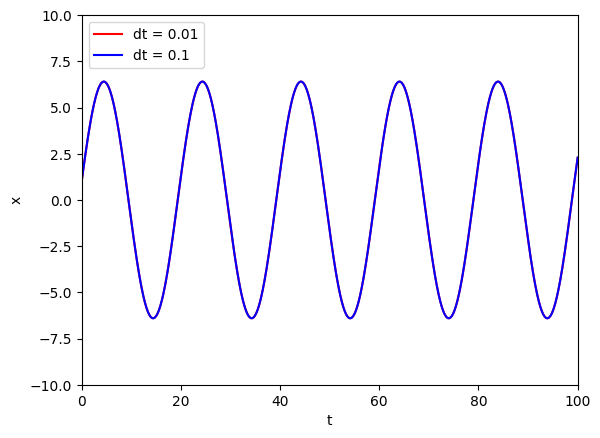

In [11]:
# Verlet method
def verlet(f, t0, x0, v0, t_total, dt, **kwargs):
    # f:  2nd derivative function
    # t0: initial time
    # x0: initial position x
    # v0: initial velocity v
    # t_total: total simulation time
    # dt: time step size 
    t_all = np.arange(t0, t_total + dt, dt)
    n_all = len(t_all)
    x_all = np.zeros(n_all)
    x_all[0] = x0
    x_all[1] = x0 + dt * v0 + 0.5 * dt * dt * f(t_all[0], x0, **kwargs)
    for i in range(1, n_all - 1):
        x_all[i + 1] = 2 * x_all[i] - x_all[i - 1] + dt * dt * f(t_all[i], x_all[i], **kwargs)
    return np.vstack((t_all, x_all)).T   # the output is a matrix of t, x for all time steps

# Run Verlet simulation 1, dt = 0.01
result_ho_v = verlet(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt1, k=k)
# Run Verlet simulation 2, dt = 0.1
result_ho_v2 = verlet(f=f_ho, t0=0, x0=1, v0=2, t_total=100, dt=dt2, k=k)

# Plotting the outcomes (only x)
plt.plot(result_ho_v[:, 0], result_ho_v[:, 1], color='red', label='dt = 0.01')
plt.plot(result_ho_v2[:, 0], result_ho_v2[:, 1], color='blue', label='dt = 0.1')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(0, 100)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.show()